# Random Forest 

In this example, I'm asking **which features are driving the differences between the negcons and treatments for each day: 1, 15 and 30 days of treatment**.

For this:

### 1. Import the functions, define some inputs, and import profiles;
### 2. Run Random Forest in a loop + evaluation
    - Consider that your dataframe has subgroups by which you want to slice the df before calculating the random forest model. 
    - If not your case, go to 3. 
### 3. Run Random Forest + evaluation
### 4. Save shap values and features to df and export

# 1. Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import easygui as eg
import numpy as np
import sys
import os

sys.path.append(r"C:\Users\Fer\Documents\GitHub") #add here the path in your computer to scripts_notebooks_fossa

from scripts_notebooks_fossa.machine_learning import random_forest_utils

%load_ext autoreload
%autoreload 2

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


- Define some variables that will be used later in the notebook

In [3]:
myfile = eg.fileopenbox(msg="Choose a file", default=r"F:")
print('Filename', myfile)
df = pd.read_csv(myfile)
df.head()

Filename F:\2022_09_09_LiveCellPainting_fossa_Cimini\workspace\profiles\2021_10_08_AgNPViability\2_FeatSelect_negconNonTrAndAgNP_pycombat.csv


,Unnamed: 0,Metadata_plate_map_name,Metadata_Compound,Metadata_NPSize_nm,Metadata_Concentration_mgml,Metadata_Concentration_uM,Metadata_Cell,Metadata_control_type,Metadata_Plate,Metadata_Well,...,Nuclei_Texture_Correlation_CorrPI_20_01_256,Nuclei_Texture_Correlation_CorrPI_20_02_256,Nuclei_Texture_Correlation_CorrPI_20_03_256,Nuclei_Texture_Correlation_CorrPI_5_00_256,Nuclei_Texture_Correlation_CorrPI_5_01_256,Nuclei_Texture_DifferenceVariance_CorrGFP_20_03_256,Nuclei_Texture_Entropy_CorrGFP_10_01_256,Nuclei_Texture_Entropy_CorrGFP_20_02_256,Nuclei_Texture_Entropy_CorrPI_20_01_256,Nuclei_Texture_SumVariance_CorrGFP_20_03_256
0,0,platemap_agnp,DMSO,0.0,10.000000,10.0000,Huh7,NaN,211020_085918_Plate_1,B2,...,-3.040094,0.426281,-6.224937,0.289446,2.101180,0.200456,0.627755,0.430426,0.744437,2.539840
1,1,platemap_agnp,AgNP,40.0,0.000010,0.0011,Huh7,negcon,211020_085918_Plate_1,B3,...,0.869272,3.066179,-0.445715,0.446767,1.642236,-1.243979,1.826077,2.996182,2.609221,2.788302
2,2,platemap_agnp,AgNP,40.0,0.000020,0.0022,Huh7,NaN,211020_085918_Plate_1,B4,...,1.019367,1.997497,0.746693,0.264054,1.349547,-1.579239,2.273157,3.797980,3.264180,3.052398
3,3,platemap_agnp,AgNP,40.0,0.000039,0.0043,Huh7,NaN,211020_085918_Plate_1,B5,...,0.647957,3.605481,1.426029,1.156000,2.393404,-1.759080,2.593756,3.956161,3.335599,3.738272
4,4,platemap_agnp,AgNP,40.0,0.000078,0.0087,Huh7,NaN,211020_085918_Plate_1,B6,...,-0.405335,4.082781,0.301357,1.272607,2.796243,-1.876359,2.507920,3.833977,3.489078,2.735638


In [5]:
#Select which Metadata cols to join and paste into cols_to_join
#new_col is the col name we are using later
cols_to_join = ["Metadata_Compound", "Metadata_NPSize_nm", "Metadata_Concentration_uM"]

df, new_col = random_forest_utils.col_generator(df, cols_to_join = cols_to_join)

NPSize_nm
Concentration_uM
Names of the compounds + concentration:  ['DMSO 0.0 10.0' 'AgNP 40.0 0.0011' 'AgNP 40.0 0.0022' 'AgNP 40.0 0.0043'
 'AgNP 40.0 0.0087' 'AgNP 40.0 0.0174' 'AgNP 40.0 0.0347'
 'AgNP 40.0 0.0694' 'AgNP 40.0 0.1389' 'Non-treated 0.0 0.0'
 'AgNP 100.0 0.009' 'AgNP 100.0 0.017' 'AgNP 100.0 0.035'
 'AgNP 100.0 0.069' 'AgNP 100.0 0.139' 'AgNP 100.0 0.278'
 'AgNP 100.0 0.556' 'AgNP 100.0 1.111']


In [41]:
#Select which Metadata cols to join and paste into cols_to_join
#new_col is the col name we are using later
cols_to_join = ["Metadata_Compound", "Metadata_NPSize_nm"]

df, filter_col = random_forest_utils.col_generator(df, cols_to_join = cols_to_join)

NPSize_nm
Names of the compounds + concentration:  ['DMSO 0.0' 'AgNP 40.0' 'Non-treated 0.0' 'AgNP 100.0']


# Ag100


## Same grouping that I did for morpheus for comparison

In [131]:
list_filter=['Non-treated 0.0 0.0','AgNP 100.0 0.556', 'AgNP 100.0 1.111']
df_filtered = df.query(f'{new_col} in {list_filter}').reset_index(drop=True)

In [132]:
X, all_feature_importances, aggregate_feature_importances, model = random_forest_utils.random_forest_iterations(df_filtered, 
                                                                    target = 'Metadata_Compound', 
                                                                    # ccp = 0.08, 
                                                                    n_estimators=100, 
                                                                    max_depth=5, 
                                                                    number_iterations=100
                                                                    # slice = True, column_slice = "Metadata_Time", slice_to_value = 1
                                                                    )


Mean Training Accuracy: 1.0
Mean Testing Accuracy: 1.0


In [133]:
feat_importance_sd = np.std(all_feature_importances, axis=0)

In [134]:
feature_ranking = np.argsort(aggregate_feature_importances)[::-1]

In [140]:
features=[]
importance=[]
importance_sd=[]
for i, feature_index in enumerate(feature_ranking):
        if i < 30:
                # print(f"{X.columns[feature_index]}: {aggregate_feature_importances[feature_index]}")
                features.append(X.columns[feature_index])
                importance.append(aggregate_feature_importances[feature_index])
                importance_sd.append(feat_importance_sd[feature_index])

In [141]:
df_results = pd.DataFrame(list(zip(features, importance, importance_sd)), columns=['features', 'importance', 'importance_sd'])

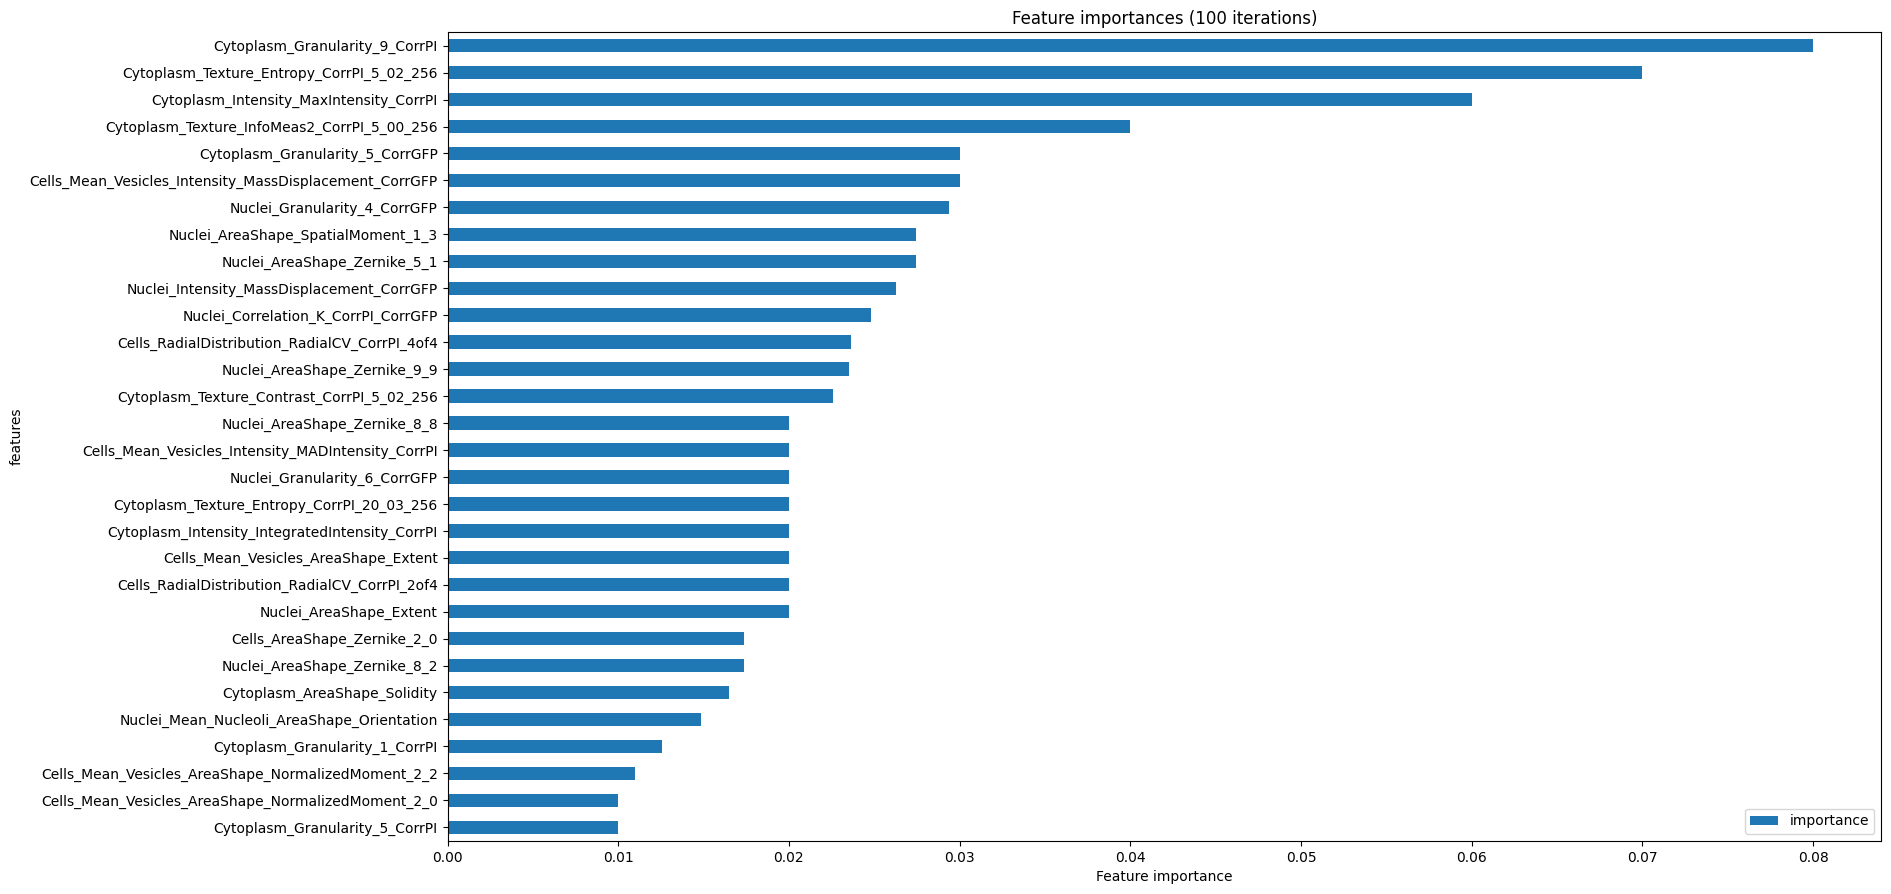

In [143]:
fig, ax = plt.subplots()

df_results.sort_values(by=['importance'],ascending=True).plot.barh(x='features', y='importance', yerr='importance_sd', ax=ax,align="center")
ax.set_title("Feature importances (100 iterations)")
ax.set_xlabel("Feature importance")
fig.set_size_inches(18.5, 10.5)

plt.show()

## Save shap values and features to df and export

In [144]:
experiment="Ag100_highestconc_nontreated"

In [145]:
output = fr"C:\Users\Fer\Documents\GitHub\2022_09_09_LiveCellPainting_fossa_Cimini\analysis\2021_10_08_AgNPViability\feature_importance\random_forest"
filename = f"{experiment}.csv"
out = os.path.join(output, filename)
df_results.to_csv(out, index=False)

# Ag40


## Same grouping that I did for morpheus for comparison

In [147]:
list_filter=['Non-treated 0.0 0.0','AgNP 40.0 0.0694', 'AgNP 40.0 0.1389']
df_filtered = df.query(f'{new_col} in {list_filter}').reset_index(drop=True)

In [148]:
X, all_feature_importances, aggregate_feature_importances, model = random_forest_utils.random_forest_iterations(df_filtered, 
                                                                    target = 'Metadata_Compound', 
                                                                    # ccp = 0.08, 
                                                                    n_estimators=100, 
                                                                    max_depth=5, 
                                                                    number_iterations=100
                                                                    # slice = True, column_slice = "Metadata_Time", slice_to_value = 1
                                                                    )


Mean Training Accuracy: 1.0
Mean Testing Accuracy: 1.0


In [149]:
feat_importance_sd = np.std(all_feature_importances, axis=0)

In [150]:
feature_ranking = np.argsort(aggregate_feature_importances)[::-1]

In [151]:
features=[]
importance=[]
importance_sd=[]
for i, feature_index in enumerate(feature_ranking):
        if i < 30:
                # print(f"{X.columns[feature_index]}: {aggregate_feature_importances[feature_index]}")
                features.append(X.columns[feature_index])
                importance.append(aggregate_feature_importances[feature_index])
                importance_sd.append(feat_importance_sd[feature_index])

In [152]:
df_results = pd.DataFrame(list(zip(features, importance, importance_sd)), columns=['features', 'importance', 'importance_sd'])

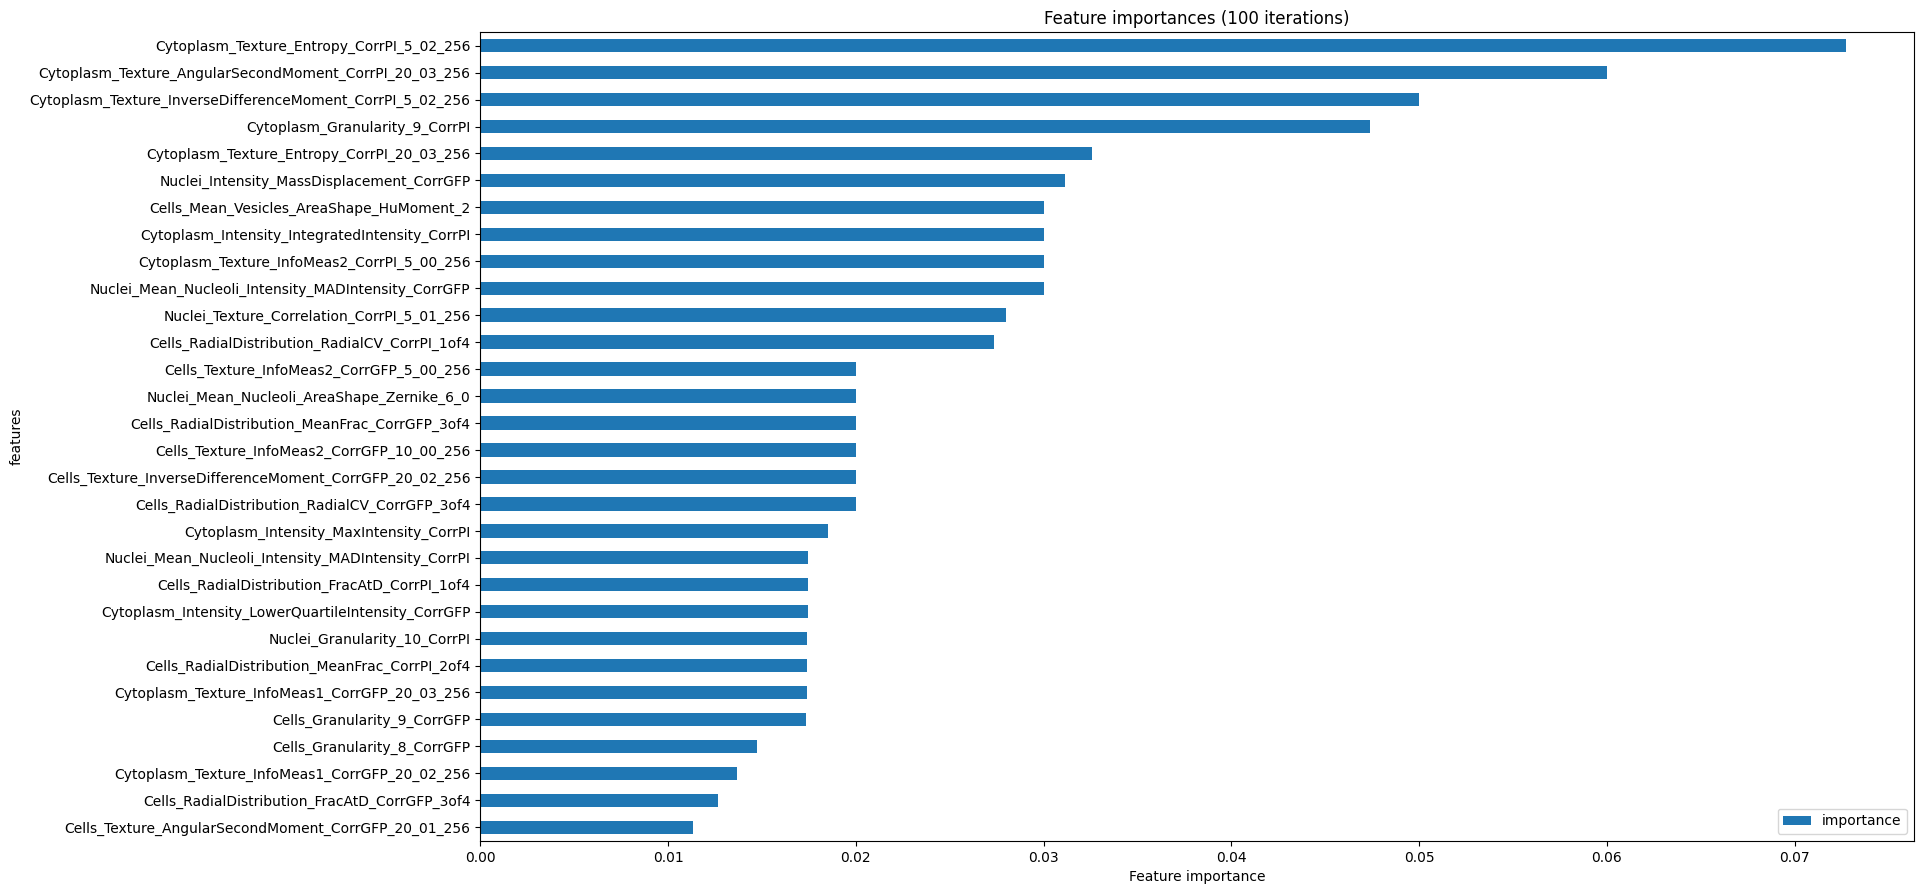

In [153]:
fig, ax = plt.subplots()

df_results.sort_values(by=['importance'],ascending=True).plot.barh(x='features', y='importance', yerr='importance_sd', ax=ax,align="center")
ax.set_title("Feature importances (100 iterations)")
ax.set_xlabel("Feature importance")
fig.set_size_inches(18.5, 10.5)

plt.show()

## Save shap values and features to df and export

In [154]:
experiment="Ag40_highestconc_nontreated"

In [155]:
output = fr"C:\Users\Fer\Documents\GitHub\2022_09_09_LiveCellPainting_fossa_Cimini\analysis\2021_10_08_AgNPViability\feature_importance\random_forest"
filename = f"{experiment}.csv"
out = os.path.join(output, filename)
df_results.to_csv(out, index=False)